### Access swot lake data through earthdata.
1. SWOT_L2_HR_Raster
2. SWOT_L2_HR_PIXC

In [1]:
import os 
import numpy as np
import earthaccess
import xarray as xr
import matplotlib.pyplot as plt


/Users/luo/miniconda3/envs/swot/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# dir_raster = 'data/qinghai-lake/swot-raster'
dir_pixc = 'data/qinghai-lake/swot-pixc'


In [3]:
auth = earthaccess.login()
# granual_name_pixc = '*_049_198L*'   ## granual name for dianchi
granual_name_pixc = '*_105_219L*'   ## granual name for qinghai lake
# continent_code = "AS"         ## e.g. "AF", "NA", "EU", "SI", "AS", "AU", "SA", "AR", "GR"
region_dianchi = (102.408, 24.570, 103.009, 25.015)    ## dianchi: (left, bottom, right, up)
time_range = ('2024-01-01 00:00:00', '2024-12-31 23:59:59')  ## temporal range.


#### 1. SWOT_L2_HR_PIXC product.

In [4]:
links_list = []
raster_results = earthaccess.search_data(short_name = 'SWOT_L2_HR_PIXC_2.0', 
                                    temporal = time_range,
                                    granule_name = granual_name_pixc,
                                    # bounding_box = region_dianchi
                                    )
for r in range(len(raster_results)):
    lake_link = earthaccess.results.DataGranule.data_links(raster_results[r], access='external')[0]
    links_list.append(lake_link)
links_list = links_list[::2]
print(len(links_list))
earthaccess.download(links_list, dir_pixc)


9


QUEUEING TASKS | : 100%|██████████| 9/9 [00:00<00:00, 2121.19it/s]
PROCESSING TASKS | : 100%|██████████| 9/9 [05:53<00:00, 39.29s/it]
COLLECTING RESULTS | : 100%|██████████| 9/9 [00:00<00:00, 80487.71it/s]


['data/qinghai-lake/swot-pixc/SWOT_L2_HR_PIXC_009_105_219L_20240107T212120_20240107T212131_PIC0_01.nc',
 'data/qinghai-lake/swot-pixc/SWOT_L2_HR_PIXC_010_105_219L_20240128T180626_20240128T180637_PIC0_01.nc',
 'data/qinghai-lake/swot-pixc/SWOT_L2_HR_PIXC_012_105_219L_20240310T113634_20240310T113645_PIC0_01.nc',
 'data/qinghai-lake/swot-pixc/SWOT_L2_HR_PIXC_016_105_219L_20240601T223654_20240601T223705_PIC0_01.nc',
 'data/qinghai-lake/swot-pixc/SWOT_L2_HR_PIXC_018_105_219L_20240713T160702_20240713T160713_PIC0_01.nc',
 'data/qinghai-lake/swot-pixc/SWOT_L2_HR_PIXC_020_105_219L_20240824T093710_20240824T093721_PIC0_01.nc',
 'data/qinghai-lake/swot-pixc/SWOT_L2_HR_PIXC_022_105_219L_20241005T030724_20241005T030735_PIC0_01.nc',
 'data/qinghai-lake/swot-pixc/SWOT_L2_HR_PIXC_024_105_219L_20241115T203732_20241115T203743_PIC2_01.nc',
 'data/qinghai-lake/swot-pixc/SWOT_L2_HR_PIXC_026_105_219L_20241227T140741_20241227T140753_PIC2_01.nc']

In [5]:
paths_file = [os.path.join(dir_pixc, file) for file in os.listdir(dir_pixc) if 'PIXC_' in file and 'masked' not in file]
paths_file = sorted(paths_file)
print(paths_file[0])
pixc_nc = xr.open_dataset(paths_file[0], group='pixel_cloud')
pixc_nc


data/qinghai-lake/swot-pixc/SWOT_L2_HR_PIXC_009_105_219L_20240107T212120_20240107T212131_PIC0_01.nc


<xarray.Dataset> Size: 3GB
Dimensions:                                (points: 9315295, complex_depth: 2,
                                            num_pixc_lines: 3282)
Coordinates:
    latitude                               (points) float64 75MB ...
    longitude                              (points) float64 75MB ...
Dimensions without coordinates: points, complex_depth, num_pixc_lines
Data variables: (12/61)
    azimuth_index                          (points) float64 75MB ...
    range_index                            (points) float64 75MB ...
    interferogram                          (points, complex_depth) float32 75MB ...
    power_plus_y                           (points) float32 37MB ...
    power_minus_y                          (points) float32 37MB ...
    coherent_power                         (points) float32 37MB ...
    ...                                     ...
    pixc_line_qual                         (num_pixc_lines) float64 26kB ...
    pixc_line_to_tvp                       (num_pixc_lines) float32 13kB ...
    data_window_first_valid                (num_pixc_lines) float64 26kB ...
    data_window_last_valid                 (num_pixc_lines) float64 26kB ...
    data_window_first_cross_track          (num_pixc_lines) float32 13kB ...
    data_window_last_cross_track           (num_pixc_lines) float32 13kB ...
Attributes:
    description:                 cloud of geolocated interferogram pixels
    interferogram_size_azimuth:  3282
    interferogram_size_range:    5080
    looks_to_efflooks:           1.5526168976187837
    num_azimuth_looks:           7.0
    azimuth_offset:              5

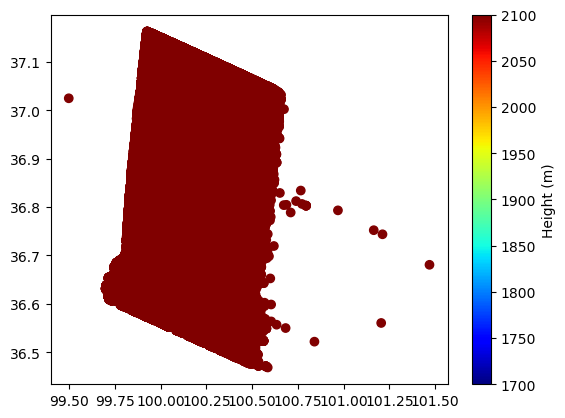

In [ ]:
# mask to get good water pixels
plt.scatter(x=pixc_nc.longitude, y=pixc_nc.latitude, c=pixc_nc.height, cmap='jet')
# plt.clim((1700,2100))
plt.colorbar().set_label('Height (m)')



#### 2. SWOT_L2_HR_Raster product.

<!-- #### 1. SWOT_L2_HR_Raster product 
##### 1.1 For the dianchi lake. -->


In [ ]:
# granual_name_raster = '*_100m_*_049_099F*'   ## granual name for dianchi
# links_list = []
# raster_results = earthaccess.search_data(short_name = 'SWOT_L2_HR_Raster_2.0', 
#                                     temporal = time_range,
#                                     granule_name = granual_name_raster,
#                                     # bounding_box = region_dianchi  # bounds of the region
#                                     # polygon = region_coords        # polygon.exterior.coords of the region
#                                     )
# for r in range(len(raster_results)):
#     lake_link = earthaccess.results.DataGranule.data_links(raster_results[r], access='external')[0]
#     links_list.append(lake_link)
# links_list = links_list[::2]
# print(len(links_list))
# # earthaccess.download(links_list, dir_raster)


9


In [ ]:
# ## Check original .nc raster file.
# paths_file = [os.path.join(dir_raster, file) for file in os.listdir(dir_raster) if 'Raster_100m_' in file and 'masked' not in file]
# print(paths_file[0])
# raster_nc = xr.open_dataset(paths_file[0], decode_times=False)
# raster_nc


Text(0.5, 1.0, 'sig0')

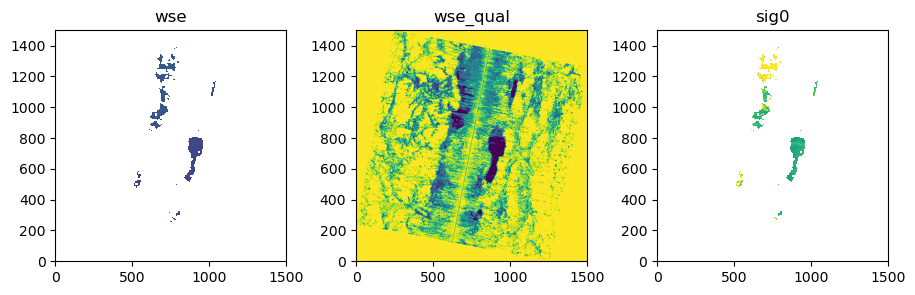

In [ ]:
# fig, ax = plt.subplots(1,3, figsize=(11, 3))
# ax[0].imshow(raster_nc.wse, origin='lower'); ax[0].set_title('wse')
# ax[1].imshow(raster_nc.wse_qual, origin='lower'); ax[1].set_title('wse_qual')
# ax[2].imshow(raster_nc.sig0, vmin=-100, vmax=100, origin='lower'); ax[2].set_title('sig0')
